In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px

In [3]:
dfs = {i:None for i in range(2013, 2024)}
d = '../../../eismas/'
for key in dfs.keys():
    f = d+f'ei_{key}_12_31.json'
    print(f'R:{f}', end='\r')
    df = pd.read_json(f)[['schema2','neblaivusKaltininkai', 'apsvaigeKaltininkai',
                          'dalyviuSkaicius','zuvusiuSkaicius','suzeistuSkaicius', 
                          'apgadintuTpSkaicius', 'eismoDalyviai', 'eismoTranspPreimone']]
    dfs[key] = df

In [4]:
# print(plt.style.available)
plt.style.use(style='default')
plt.style.use(style='fivethirtyeight')

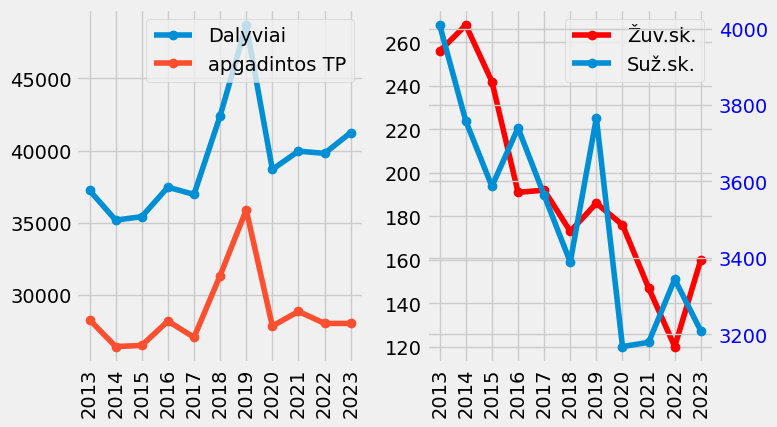

In [7]:
dalyviai, apgadintosTP, zuvusieji, suzeistieji = [],[],[],[]
metai = []
for year, df in dfs.items():
    metai.append(year)
    dalyviai.append(df['dalyviuSkaicius'].sum())
    apgadintosTP.append(df['apgadintuTpSkaicius'].sum())
    zuvusieji.append(df['zuvusiuSkaicius'].sum())
    suzeistieji.append(df['suzeistuSkaicius'].sum())

fig, (axis, axis2) = plt.subplots(1,2,figsize=(8,4.5))
#plotting code:

ax2 = axis2.twinx()
axis.plot(metai, dalyviai, label='Dalyviai', marker='o')
axis.plot(metai, apgadintosTP, label='apgadintos TP', marker='o')

line = axis2.plot(metai, zuvusieji, label='Žuv.sk.', marker='o', color='red')
line2 = ax2.plot(metai, suzeistieji, label='Suž.sk.', marker='o')
axis.legend(loc='best')
lines = line+line2
labels = [l.get_label() for l in lines]
axis2.legend(lines, labels, loc='best')
#axis.ticklabel_format(style='plain')
axis.set_xticks(metai)
axis2.set_xticks(metai)
axis.tick_params(axis='x', rotation=90)
axis2.tick_params(axis='x', rotation=90)
ax2.tick_params(axis='y', labelcolor='blue')
fig.tight_layout()
plt.show()

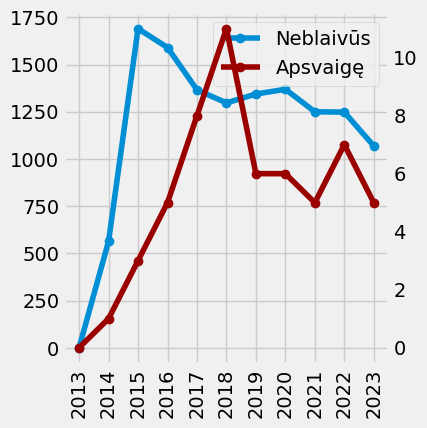

In [15]:
# neblaiviu ir apsvaigusiu kiekio kaita kas metus
metai = []
neblaivus = []
apsvaige = []
for year, df in dfs.items():
    metai.append(year)
    nbk = sum([1 for i in df['neblaivusKaltininkai'].values.tolist() if i == 'Taip'])
    abk = sum([1 for i in df['apsvaigeKaltininkai'].values.tolist() if i == 'Taip'])
    neblaivus.append(nbk)
    apsvaige.append(abk)

fig, axis = plt.subplots(figsize=(4.5,4.5))
#plotting code:
L=axis.plot(metai, neblaivus, label='Neblaivūs', marker='o')
ax2 = axis.twinx()
L2 = ax2.plot(metai, apsvaige, label='Apsvaigę', marker='o', color='xkcd:deep red')
Ls = L + L2
lbs = [i.get_label() for i in Ls]
ax2.grid(visible=False)
axis.legend(Ls, lbs, loc='best')
axis.set_xticks(metai)
axis.tick_params(axis='x',rotation=90)
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()
 

['Užvažiavimas ant gyvūno', 'Susidūrimas su stovinčia TP', 'Kiti eismo įvykiai']
{'Užvažiavimas ant gyvūno': [], 'Susidūrimas su stovinčia TP': [], 'Kiti eismo įvykiai': []}


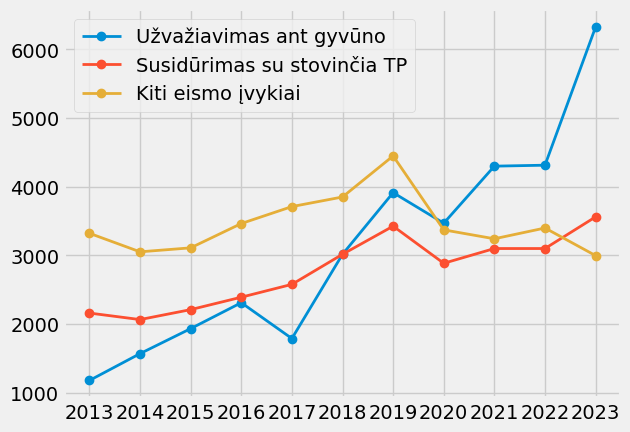

In [20]:
# Suraskite 3 populiariausias eismo įvykių schemas! 2023 metais (stulpelis schema2)
# ir pavaizduokite kitimą kas metus.

top3 = dfs[2023]['schema2'].value_counts()[:3].index.tolist()
print(top3)

years = [*range(2013, 2024)]
t3 = {}
for i in top3:
    t3[i] = []
print(t3)

for i in top3:
    for k, df in dfs.items():
        t = df['schema2'].value_counts().reset_index().query('schema2 == @i')['count'].values[0]
        t3[i].append(t)

fig, ax = plt.subplots()
for schema, count in t3.items():
    ax.plot(years, count, label=schema, marker='o', lw=2)
ax.legend(loc='best')
ax.set_xticks(years)
ax.grid(visible=True)
plt.show()        